In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
data = {
    'Teor Alcoólico': [3, 4, 5, 6],
    'Acidez': ['muito', 'pouco', 'médio', 'baixo'],
    'pH': [4.3, 2.8, 4.2, 3.9]
}

In [3]:
df = pd.DataFrame(data)
df = pd.get_dummies(df,columns=['Acidez'])

In [4]:
kmeans = KMeans(n_clusters=3) #number of clusters
kmeans.fit(df)
sse = kmeans.inertia_

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [5]:
print("SSE: ", sse)


SSE:  1.545


In [6]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

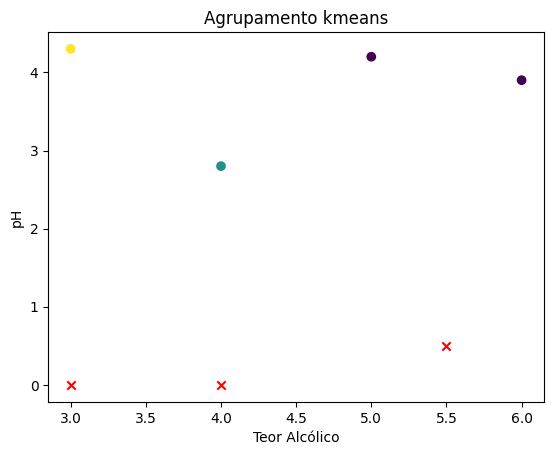

In [7]:
plt.scatter(df['Teor Alcoólico'],df['pH'],c=labels)
plt.scatter(centroids[:,0],centroids[:,2],marker='x',color='red')
plt.title("Agrupamento kmeans")
plt.xlabel("Teor Alcólico")
plt.ylabel("pH")
plt.show()

In [8]:
df['Grupo']= labels
grouped_data = df.groupby('Grupo').mean()
print(grouped_data)

       Teor Alcoólico    pH  Acidez_baixo  Acidez_muito  Acidez_médio  \
Grupo                                                                   
0                 5.5  4.05           0.5           0.0           0.5   
1                 4.0  2.80           0.0           0.0           0.0   
2                 3.0  4.30           0.0           1.0           0.0   

       Acidez_pouco  
Grupo                
0               0.0  
1               1.0  
2               0.0  
